# This notebook examines general trends in FAC data
A more thorough writeup can be found in https://drive.google.com/open?id=1U6stzP7qhqB3B10kNYnWdlgtAibwoFEI6cuKOSSq-ZU

In [26]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

processed_path = '/data/ihwang/data_journalism/allfac/processed/'
df_general = pd.read_pickle(processed_path + 'general.pkl')
# print('General DF\n', df_general.head())

# Agency prefix dictionary:
with open(processed_path + 'agency_dict', 'rb') as f_w:
    agency_dict = pickle.load(f_w)
# Entity code dictionary:
with open(processed_path + 'entity_dict', 'rb') as f_w:
    entity_dict = pickle.load(f_w)

## Plot percent of all audits by entity type

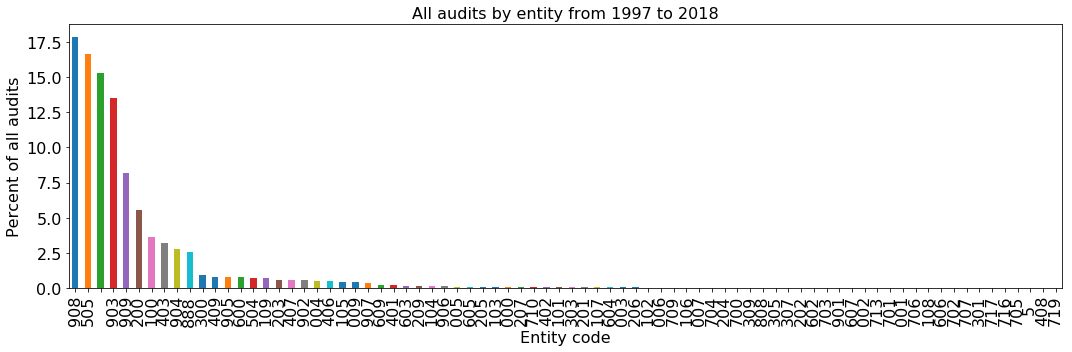

Total number of audits: 838217


In [27]:
fig, axes = plt.subplots(figsize=(15, 5))
entity_groups = df_general.groupby('TYPEOFENTITY').size().sort_values(ascending=False) / len(df_general) * 100
percent_audits_plot = entity_groups.plot(kind='bar', fontsize=16)
percent_audits_plot.set_xlabel('Entity code', fontsize=16)
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16)
percent_audits_plot.set_title(
    'All audits by entity from %s to %s' %(min(df_general['AUDITYEAR']), max(df_general['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_general))

## Plot percent of all audits by state

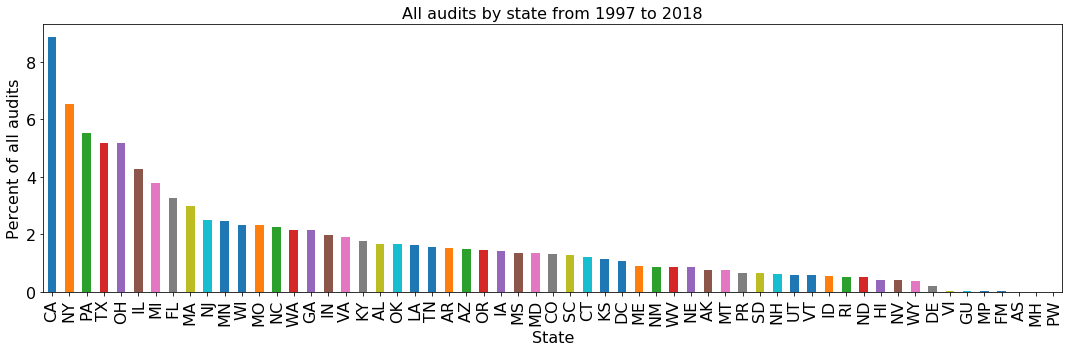

Total number of audits: 838217


In [28]:
fig, axes = plt.subplots(figsize=(15, 5))
entity_groups = df_general.groupby('STATE').size().sort_values(ascending=False) / len(df_general) * 100
percent_audits_plot = entity_groups.plot(kind='bar', fontsize=16)
percent_audits_plot.set_xlabel('State', fontsize=16)
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16)
percent_audits_plot.set_title(
    'All audits by state from %s to %s' %(min(df_general['AUDITYEAR']), max(df_general['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_general))

## Opinions on Financial Statements and Major Program Compliance for all Q, A or D audits

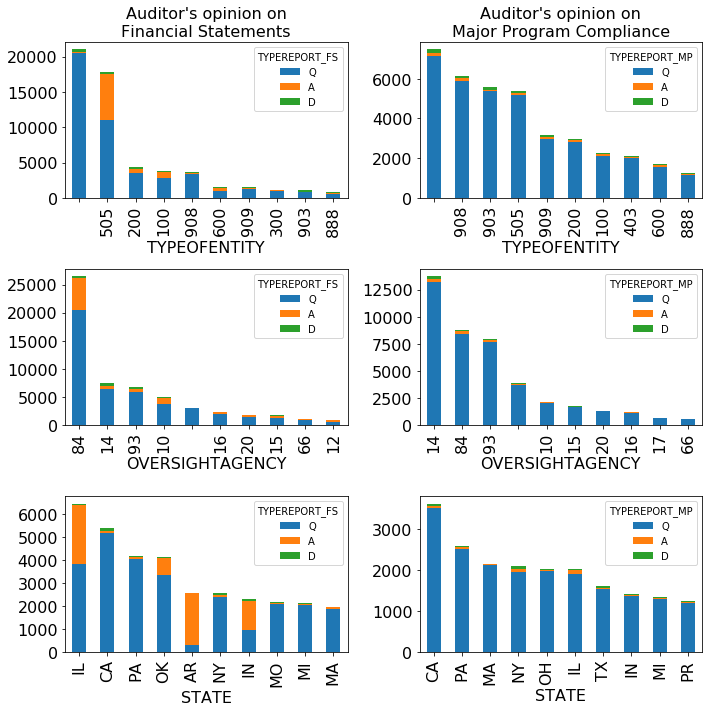

In [220]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
for (i, sortby) in enumerate(['TYPEOFENTITY', 'OVERSIGHTAGENCY', 'STATE']):
    for j, (cat_string, cat) in enumerate(
        [('Financial Statements', 'TYPEREPORT_FS'), ('Major Program Compliance', 'TYPEREPORT_MP')]
    ):
        df_qad = df_general[df_general[cat].isin(['Q','A','D'])]
        top_10_sortby = df_qad[sortby].value_counts().head(10).index
        df_top10_sortby = df_qad[df_qad[sortby].isin(top_10_sortby)]
        df_top10_qad = df_top10_sortby.groupby(sortby)[cat].value_counts()
        subplot = df_top10_qad.reindex(index=top_10_sortby, level=0).unstack()[['Q', 'A', 'D']].\
        plot(
            kind='bar', fontsize=16, stacked=True, ax=axes[i, j]
        )
        if i == 0:
            subplot.set_title('Auditor\'s opinion on\n%s' %cat_string, fontsize=16)
        subplot.set_xlabel(sortby, fontsize=16)
plt.tight_layout()
plt.show()
states = list(top_10_sortby)